# Movielens 영화 추천

오늘은 머신러닝 애플리케이션 중 가장 상업적인 성공을 거둔 것으로 평가받고 있는 추천 시스템(Recommender System) 에 대해 알아보려고 한다. 어느덧 추천 시스템은 우리 생활 깊숙이 들어와 있다. 유튜브, 넷플릭스 등 동영상 플랫폼이 기가 막히게 내가 좋아할 만한 콘텐츠를 찾아서 자동으로 플레이해 주고 있다. 아마존, 쿠팡 온라인 쇼핑 사이트에서도 내 취향에 맞는 상품 추천을 쉽게 접할 수 있다. 페이스북, 인스타그램 같은 SNS는 말할 것도 없고, 뉴스나 광고까지도 추천 시스템의 원리가 숨어들어 있다.

이런 추천 시스템의 원리를 한 문장으로 줄인다면 "나와 비슷한 다른 사용자들이 좋아하는 것과 비슷한 것을 내게 추천해 준다." 일 것이다. 하지만 어떤 사용자들이 나와 비슷한지를 어떻게 알 수 있을까? 또 어떤 상품이나 정보가 서로 유사한지는 어떻게 알 수 있는 걸까? 오늘의 과정을 통해 추천 시스템의 기본 원리를 파악해 보고 나만의 추천 시스템을 만들어 본다.

## 추천 시스템이란?

온라인 콘텐츠 서비스에서 데이터 분석과 AI 기술을 접목한 추천 시스템의 활용은 이제 선택이 아닌 필수가 된 것 같다. 우리가 흔히 사용하고 있는 음원 서비스를 예로 들어 보겠다.

유튜브 뮤직, 스포티파이, 애플 뮤직, 멜론 등 여러 음원 서비스 중 추천 시스템을 통한 개인화 서비스가 없는 곳을 찾기가 힘들어졌다. 과거 음원 차트로 유명하던 멜론에서도 2020년의 업데이트에서 메인이었던 음원 차트를 홈화면에서 없애고 개인 맞춤 서비스를 전면에 배치했다.

이러한 음원 서비스 제공자들은 수많은 유저들이 어떤 아티스트의 노래를 들었는지에 대한 광범위한 데이터를 축적하고 있다. 이러한 빅데이터가 정확한 추천의 원동력이 되고 있다는 것은 어렴풋이 짐작할 수 있을 것이다.

그러나 그 추천의 원리가 어떤 것인지 좀 더 구체적으로 파악해 볼 필요가 있다. 그럼 아래 링크를 참고하자.

[콘텐츠 추천 알고리즘의 진화][1]

[1]:http://www.kocca.kr/insight/vol05/vol05_04.pdf

추천 시스템은 이처럼

● 아이템은 매우 많고  
● 유저의 취향은 다양할 때

유저가 소비할 만한 아이템을 예측하는 모델이다.

몇 가지 실제 사례를 보면,

● 유튜브 : 동영상이 매일 엄청나게 많이 올라오고 유저의 취향(게임 선호, 뷰티 선호, 지식 선호, 뉴스 선호)이 다양하다.  
● 페이스북 : 포스팅되는 글이 엄청 많고 유저가 관심 있는 페이지, 친구, 그룹은 전부 다르다.  
● 아마존 : 카테고리를 한정해도 판매 품목이 엄청 많고 좋아하는 브랜드, 구매 기준이 다양하다.

아티스트는 수없이 많고 새로운 아티스트가 계속 나오기 때문에, 유튜브 같은 추천 기반의 미디어 회사들은 꾸준히 아이템이 되는 아티스트 정보를 자동으로 수집하고, 사용자들이 아티스트를 선택한 정보를 업데이트하여 축적하고 있다. 이렇게 쌓인 방대한 데이터가 정확한 협업 필터링을 위한 기반이 된다.

오늘은 이렇게 쌓인 데이터 사례 중 하나를 활용하여 유저가 좋아하는 특정 영화와 유사한 다른 영화를 추천하는 추천 시스템을 만들어 볼 것이다.

## Movielens 영화 추천 실습

### Cloud jupyter내 파일 생성

In [1]:
# mkdir -p ~/aiffel/recommendata_iu/data/ml-1m
# ln -s ~/data/ml-1m/* ~/aiffel/recommendata_iu/data/ml-1m

Cloud Storage에 미리 업로드된 ml-1m폴더 내 파일을 심볼릭 링크로 개인 storage에 연결한다. Cloud shell에서 위 명령어를 입력한다.

### 라이브러리 import하기

In [2]:
import pandas as pd
import os

필요한 라이브러리를 불러들인다.

### 데이터 준비와 기본 전처리 

우리가 활용할 데이터셋은 추천 시스템의 MNIST라고 부를만한 Movielens 데이터이다.

Movielens 데이터는 rating.dat 안에 이미 인덱싱까지 완료된 사용자-영화-평점 데이터가 깔끔하게 정리되어 있다.

In [3]:
import os
rating_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/ratings.dat'
ratings_cols = ['user_id', 'movie_id', 'ratings', 'timestamp']
ratings = pd.read_csv(rating_file_path, sep='::', names=ratings_cols, engine='python', encoding = "ISO-8859-1")
orginal_data_size = len(ratings)
ratings.head()

,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
# 3점 이상만 남깁니다.
ratings = ratings[ratings['ratings']>=3]
filtered_data_size = len(ratings)

print(f'orginal_data_size: {orginal_data_size}, filtered_data_size: {filtered_data_size}')
print(f'Ratio of Remaining Data is {filtered_data_size / orginal_data_size:.2%}')

orginal_data_size: 1000209, filtered_data_size: 836478
Ratio of Remaining Data is 83.63%


유저가 3점 미만으로 준 데이터는 선호하지 않는다고 가정하고 제외한다.

In [5]:
# ratings 컬럼의 이름을 counts로 바꿉니다.
ratings.rename(columns={'ratings':'counts'}, inplace=True)

In [6]:
ratings['counts']

0          5
1          3
2          3
3          4
4          5
          ..
1000203    3
1000205    5
1000206    5
1000207    4
1000208    4
Name: counts, Length: 836478, dtype: int64

ratings 컬럼의 이름이 counts로 잘 바뀐 것을 확인할 수 있다.

In [7]:
ratings.head(10)

,user_id,movie_id,counts,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [8]:
ratings.tail(10)

,user_id,movie_id,counts,timestamp
1000198,6040,2021,3,956716374
1000199,6040,2022,5,956716207
1000200,6040,2028,5,956704519
1000201,6040,1080,4,957717322
1000202,6040,1089,4,956704996
1000203,6040,1090,3,956715518
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


ratings 컬럼의 이름이 counts로 잘 바뀌었는지 표로 확인하면 더 좋다.

In [9]:
# 사용하는 컬럼만 남겨줍니다.
using_cols = ['user_id', 'movie_id', 'counts']
ratings = ratings[using_cols]
ratings.head(10)

,user_id,movie_id,counts
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5
5,1,1197,3
6,1,1287,5
7,1,2804,5
8,1,594,4
9,1,919,4


In [10]:
# ratings = ratings[['user_id', 'movie_id', 'count']]
# ratings
# ratings = ratings.drop(['timestamp'], axis=1)
# ratings

timestamp 항목은 우리의 관심사가 아니다. 그렇기 때문에 사용하는 컬럼만 남기고 제거한다.

In [11]:
# 영화 제목을 보기 위해 메타 데이터를 읽어옵니다.
movie_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/movies.dat'
cols = ['movie_id', 'title', 'genre'] 
movies = pd.read_csv(movie_file_path, sep='::', names=cols, engine='python', encoding='ISO-8859-1')
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


영화 제목을 보기 위해 메타 데이터를 읽어온다.

In [12]:
movies['title'] = movies['title'].str.lower()
movies.head(10)

,movie_id,title,genre
0,1,toy story (1995),Animation|Children's|Comedy
1,2,jumanji (1995),Adventure|Children's|Fantasy
2,3,grumpier old men (1995),Comedy|Romance
3,4,waiting to exhale (1995),Comedy|Drama
4,5,father of the bride part ii (1995),Comedy
5,6,heat (1995),Action|Crime|Thriller
6,7,sabrina (1995),Comedy|Romance
7,8,tom and huck (1995),Adventure|Children's
8,9,sudden death (1995),Action
9,10,goldeneye (1995),Action|Adventure|Thriller


검색을 쉽게 하기 위해 'title'을 소문자로 바꿔 준다.

In [13]:
movies.tail()

,movie_id,title,genre
3878,3948,meet the parents (2000),Comedy
3879,3949,requiem for a dream (2000),Drama
3880,3950,tigerland (2000),Drama
3881,3951,two family house (2000),Drama
3882,3952,"contender, the (2000)",Drama|Thriller


확인을 해보니 소문자로 잘 바뀌었다.

지금부터는 원활한 진행을 위해 ratings, movies 데이터를 합치겠다.

In [14]:
movie_data = pd.merge(ratings, movies)
movie_data

,user_id,movie_id,counts,title,genre
0,1,1193,5,one flew over the cuckoo's nest (1975),Drama
1,2,1193,5,one flew over the cuckoo's nest (1975),Drama
2,12,1193,4,one flew over the cuckoo's nest (1975),Drama
3,15,1193,4,one flew over the cuckoo's nest (1975),Drama
4,17,1193,5,one flew over the cuckoo's nest (1975),Drama
...,...,...,...,...,...
836473,5851,3607,5,one little indian (1973),Comedy|Drama|Western
836474,5854,3026,4,slaughterhouse (1987),Horror
836475,5854,690,3,"promise, the (versprechen, das) (1994)",Romance
836476,5938,2909,4,"five wives, three secretaries and me (1998)",Documentary


In [15]:
#movie_data = pd.merge(ratings, movies, on='movie_id')
#movie_data

### 데이터 탐색

(참고) pandas.DataFrame.nunique()은 특정 컬럼에 포함된 유니크한 데이터의 개수를 알아보는데 유용하다. 아래와 같이 영화 수, 유저 수만 확인 가능하다.

In [16]:
# 영화 수
movies['title'].nunique()

3883

In [17]:
# 유저 수
ratings['user_id'].nunique()

6039

아래와 같이 인기 많은 영화 30개만 찾아보는 것도 가능하다.

In [18]:
# 인기 많은 영화
# movie_data = pd.merge(ratings, movies)
popular_movie = movie_data.groupby('title')['user_id'].count()
popular_movie.sort_values(ascending=False).head(30)

title
american beauty (1999)                                   3211
star wars: episode iv - a new hope (1977)                2910
star wars: episode v - the empire strikes back (1980)    2885
star wars: episode vi - return of the jedi (1983)        2716
saving private ryan (1998)                               2561
terminator 2: judgment day (1991)                        2509
silence of the lambs, the (1991)                         2498
raiders of the lost ark (1981)                           2473
back to the future (1985)                                2460
matrix, the (1999)                                       2434
jurassic park (1993)                                     2413
sixth sense, the (1999)                                  2385
fargo (1996)                                             2371
braveheart (1995)                                        2314
men in black (1997)                                      2297
schindler's list (1993)                                  2257
pr

### 모델 검증을 위한 사용자 초기 정보 세팅
우리는 본인의 영화 취향과 가장 유사한 영화를 추천받으려 한다. 유튜브 뮤직 등 추천 시스템들은 이를 위해서 처음 가입하는 사용자의 취향과 유사한 아티스트 정보를 5개 이상 입력받는 과정을 거치게 하는 경우가 많다.  
우리도 동일한 과정이 필요하다. 우리가 만든 추천 시스템의 추후 검증 과정을 위해 '나는 A를 좋아한다.'라는 정보를 위 데이터셋에 5개 이상 추가해 주어야 한다. 아래와 같이 선호하는 영화들을 기존의 데이터에 추가해서 넣겠다.

In [19]:
# 본인이 좋아하시는 영화 데이터로 바꿔서 추가하셔도 됩니다! 단, 이름은 꼭 데이터셋에 있는 것과 동일하게 맞춰주세요. 
my_favorite = ['jurassic park (1993)' , 'Men in Black (1997)' ,'terminator 2: judgment day (1991)' ,'terminator, the (1984)' ,'matrix, the (1999)']

# 'yong'이라는 user_id가 위 영화를 5회씩 보았다고 가정하겠습니다.
my_movielist = pd.DataFrame({'user_id': ['yong']*5, 'title': my_favorite, 'counts':[5]*5})

if not ratings.isin({'user_id':['yong']})['user_id'].any():  # user_id에 'yong'이라는 데이터가 없다면
    movie_data = movie_data.append(my_movielist)                           # 위에 임의로 만든 my_favorite 데이터를 추가해 줍니다. 

movie_data.tail(10)       # 잘 추가되었는지 확인해 봅시다.

,user_id,movie_id,counts,title,genre
836473,5851,3607.0,5,one little indian (1973),Comedy|Drama|Western
836474,5854,3026.0,4,slaughterhouse (1987),Horror
836475,5854,690.0,3,"promise, the (versprechen, das) (1994)",Romance
836476,5938,2909.0,4,"five wives, three secretaries and me (1998)",Documentary
836477,5948,1360.0,5,identification of a woman (identificazione di ...,Drama
0,yong,NaN,5,jurassic park (1993),NaN
1,yong,NaN,5,Men in Black (1997),NaN
2,yong,NaN,5,terminator 2: judgment day (1991),NaN
3,yong,NaN,5,"terminator, the (1984)",NaN
4,yong,NaN,5,"matrix, the (1999)",NaN


### 모델에 활용하기 위한 전처리
사람이 태어나면 주민등록번호를, 학교에 가면 출석번호를 주듯이 데이터의 관리를 쉽게 하기 위해 번호를 붙여준다. 우리가 다루는 데이터에서는 user와 movie 각각에 번호를 붙일 것이다. 보통 이런 작업을 indexing이라고 한다. 이는 추천 시스템, 자연어 처리에서 자주 하는 작업들이다!

(참고) pandas.DataFrame.unique()은 특정 컬럼에 포함된 유니크한 데이터만 모아 준다. indexing 작업을 위해 매우 유용하다.

In [20]:
# 고유한 유저, 영화를 찾아내는 코드
user_unique = movie_data['user_id'].unique()
movie_unique = movie_data['title'].unique()

# 유저, 영화 indexing 하는 코드 idx는 index의 약자입니다.
user_to_idx = {v:k for k,v in enumerate(user_unique)}
movie_to_idx = {v:k for k,v in enumerate(movie_unique)}

In [21]:
# 인덱싱이 잘 되었는지 확인해 봅니다. 
print(user_to_idx['yong'])    # 만약 358869명의 유저 중 마지막으로 추가된 유저라면 358868이 나와야 합니다.
print(movie_to_idx['jurassic park (1993)'])

6039
107


In [22]:
# indexing을 통해 데이터 컬럼 내 값을 바꾸는 코드
# dictionary 자료형의 get 함수는 https://wikidocs.net/16 을 참고하세요.

# user_to_idx.get을 통해 user_id 컬럼의 모든 값을 인덱싱한 Series를 구해 봅시다. 
# 혹시 정상적으로 인덱싱되지 않은 row가 있다면 인덱스가 NaN이 될 테니 dropna()로 제거합니다. 
temp_user_data = movie_data['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(movie_data):   # 모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!!')
    movie_data['user_id'] = temp_user_data   # data['user_id']을 인덱싱된 Series로 교체해 줍니다. 
else:
    print('user_id column indexing Fail!!')

# movie_to_idx을 통해 title 컬럼도 동일한 방식으로 인덱싱해 줍니다. 
temp_movie_data = movie_data['title'].map(movie_to_idx.get).dropna()
if len(temp_movie_data) == len(movie_data):
    print('title column indexing OK!!')
    movie_data['title'] = temp_movie_data
else:
    print('title column indexing Fail!!')

user_id column indexing OK!!
title column indexing OK!!


In [23]:
movie_data

,user_id,movie_id,counts,title,genre
0,0,1193.0,5,0,Drama
1,1,1193.0,5,0,Drama
2,2,1193.0,4,0,Drama
3,3,1193.0,4,0,Drama
4,4,1193.0,5,0,Drama
...,...,...,...,...,...
0,6039,NaN,5,107,NaN
1,6039,NaN,5,3628,NaN
2,6039,NaN,5,92,NaN
3,6039,NaN,5,200,NaN


movie_data의 user_id, title 컬럼 내 값들이 모두 정수 인덱스 값으로 잘 변경되었다. 이것으로 훈련을 위한 모든 전처리가 완료되었다.

In [24]:
# movie_data['movie_id'] = movie_data['movie_id'].astype(int)
# movie_data.tail()

## 사용자의 명시적/암묵적 평가 (참고)

우리의 추천 시스템은 사용자들이 아이템을 얼마나 선호하는지를 모델링 하기를 원한다. 그러자면 사용자의 아이템 선호도를 말해 주는 유저 행동 데이터셋이 필요하다. 만약 우리 데이터가 좋아요나 별점처럼 선호도를 명시적(explicit)으로 나타내는 것이라면 참 좋겠지만, 지금 우리가 가지고 있는 데이터는 사용자가 아티스트의 곡을 몇 번 플레이했나 하는 것뿐이다. 이렇게 서비스를 사용하면서 자연스럽게 발생하는 암묵적(implicit)인 피드백도 사용자의 아이템에 대한 평가를 알 수 있는 단서가 될 수 있다.

[Collaborative Filtering for Implicit Feedback Datasets][1] 논문에는 추천시스템에서 암묵적 피드백 데이터셋을 활용할 때의 고민이 잘 담겨있다. 해당 논문에서는 이를 위해 염두해두어야할 암묵적 피드백 데이터셋의 특징을 다음과 같이 정리한다.

[1]:http://yifanhu.net/PUB/cf.pdf

● 부정적인 피드백이 없다.(No Negative Feedback)  
● 애초에 잡음이 많다.(Inherently Noisy)  
● 수치는 신뢰도를 의미한다.(The numerical value of implicit feedback indicates confidence)  
● Implicit-feedback Recommender System의 평가는 적절한 방법을 고민해봐야 한다.(Evaluation of implicit-feedback recommender requires appropriate measures)

우리가 앞으로 만들어갈 모델에서는 암묵적 데이터의 해석을 위해 다음과 같은 규칙을 적용한다.

● 한 번이라도 들었으면 선호한다고 판단한다.  
● 많이 재생한 아티스트에 대해 가중치를 주어서 더 확실히 좋아한다고 판단한다.

## Matrix Factorization(MF) (참고)

데이터가 준비되었으니 이제 모델을 만들 차례다.

아래 그림의 왼쪽에서 보는 것처럼, 우리는 m명의 사용자들이 n명의 아티스트에 대해 평가한 데이터를 포함한 (m,n) 사이즈의 평가 행렬(Rating Matrix)을 만들 것이다. 행렬 중 일부는 데이터가 채워져 있지만, 나머지 부분은 데이터가 비어 있다. 우리가 앞에서 살펴보았던 추천 시스템의 협업 필터링(Collaborative Filtering)이란 결국은 이런 평가 행렬을 전제로 하는 것이다. 만약 우리가 이 평가 행렬의 비어 있는 부분을 포함한 완벽한 정보를 얻을 수만 있다면 (모든 사용자의 모든 아이템에 대한 선호도를 다 파악한 셈이니) 그야말로 완벽한 추천이 가능해질 것이다.

우리는 추천 시스템의 다양한 모델 중 Matrix Factorization(MF, 행렬 분해) 모델을 사용하겠다. MF 모델은 2006년 Netflix에서 백만 달러의 상금을 걸고 개최한 자사 추천 시스템의 성능을 10% 이상 향상시키는 챌린지를 계기로 알려지게 되었다. 기본 아이디어는 아래 그림과 같다. (m,n) 사이즈의 행렬 R을 (m,k) 사이즈의 행렬 P와 (k,n) 사이즈의 행렬 Q로 분해한다면 R이란 그저 P와 Q의 행렬곱으로 표현 가능할 수 있다는 간단한 아이디어이다. 대체로 k는 m이나 n보다 훨씬 작은 값이기 때문에 계산량 측면으로도 훨씬 유리해진다. 하지만 아이디어의 단순함에도 불구하고 MF 모델은 성능이 준수하고 Scalability가 좋아서 많이 사용되는 모델이다.

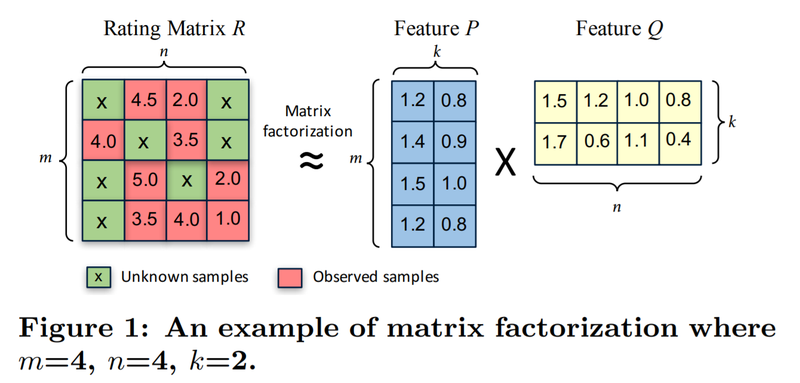

아래 그림을 다시 한번 보자. 위에 소개한 MF 모델의 개요도와 크게 다를 것은 없다. 단지, MF 모델을 사용자에게 영화를 추천하는 모델에 대입해서 그려 보았다는 정도의 차이가 있다. 위 그림 방식으로 말하자면 m=4, n=5, k=2인 MF 모델이 되겠다.

위에서 MF 모델은 큰 평가 행렬 R을 두 개의 Feature Matrix P와 Q로 분해한다고 하였다.  
무엇의 Feature일까? (m, k) 사이즈의 Feature Matrix P는 k 차원의 벡터를 사용자 수만큼 모아놓은 행렬이다. 그렇다면 아래 그림에서 첫 번째 벡터 P0=(1, 0.1)은 바로 빨간 모자를 쓴 첫 번째 사용자의 특성(Feature) 벡터가 된다.

같은 방식으로 Q 행렬의 첫 번째 벡터 Q0=(0.9, -0.2)는 해리포터 영화의 특성 벡터가 된다. MF 모델은 이 두 벡터를 내적해서 얻어지는 0.88이 바로 R0,0으로 정의되는 사용자의 영화 선호도로 보는 모델이다.

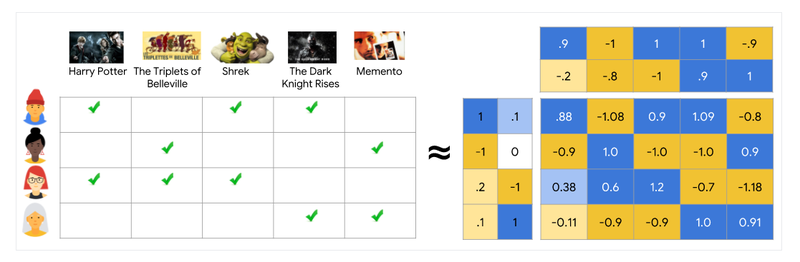

모델의 목표는 모든 유저와 아이템에 대해 k-dimension의 벡터를 잘 만드는 것이다.  
벡터를 잘 만드는 기준은 유저 i의 벡터(Ui)와 아이템 j의 벡터(Ij)를 내적했을 때 유저 i가 아이템 j에 대해 평가한 수치(Mij)와 비슷한지 이다.

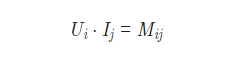

MF에도 다양한 변형이 있다. 이번에 사용할 모델은 [Collaborative Filtering for Implicit Feedback Datasets][1] 논문에서 제안한 모델을 사용할 것이다.

[1]:http://yifanhu.net/PUB/cf.pdf

이 모델의 경우 이전 스텝에서 우리가 'black eyed peas'를 play했다는 데이터를 추가했기 때문에 우리의 벡터와 black eyed peas의 벡터를 곱했을 때 1에 가까워야 모델이 잘 학습하는 것을 목표로 한다.

오해할 수 있는데, black eyed peas를 5번 들었어도 모델이 근사하고자 하는 것이 아티스트를 선호하는지 안 하는지를 맞추는 것이기 때문에 두 벡터를 곱했을 때 5에 가까워지는 대신 1에 가까워져야 한다.

이를 통해서 우리가 들어보지 못한 queen에 대해서도 우리의 벡터와 queen의 벡터를 곱하여 수치를 예상할 수 있다.

만약 목표가 유저의 재생 횟수를 맞춰야 하는 것(혹은 별점을 맞추는 것)이라면 그에 맞는 다른 모델을 사용해야 한다.

구조가 거의 똑같고 모델의 목표가 재생횟수를 맞춰지는 쪽으로 학습(유저와 아이템의 벡터를 만들기)하면 된다. 궁금하다면 [참고 자료][2]를 확인한다.

[2]:https://towardsdatascience.com/recommendation-system-matrix-factorization-d61978660b4b

## CSR(Compressed Sparse Row) Matrix (참고)

유저 X 아이템 평가 행렬을 다시 생각해 보자. 유저는 36만 명이고 아티스트는 29만 명이다. 이를 행렬로 표현하고 행렬의 각 원소에 정수 한 개 (1byte)가 들어간다면 36만 * 29만 * 1byte ≈ 97GB가 필요하다.

참고로 우리가 사용하는 컴퓨터의 메모리는 많아야 16GB일 테니 97GB나 되는 거대한 행렬을 메모리에 올려놓고 작업한다는 것은 불가능할 것이다. 이런 경우의 좋은 대안이 되는 것이 CSR(Compressed Sparse Row) Matrix이다. 다음 스텝에서 수행할 모델 학습의 input으로 사용할 데이터 타입을 CSR Matrix로 할 것이다.

CSR Matrix는 Sparse한 matrix에서 0이 아닌 유효한 데이터로 채워지는 데이터의 값과 좌표 정보만으로 구성하여 메모리 사용량을 최소화하면서도 Sparse한 matrix와 동일한 행렬을 표현할 수 있도록 하는 데이터 구조이다.

CSR Matrix는 data, indices, indptr 로 행렬을 압축하여 표현한다. 그 원리를 아래 행렬 예시를 통해 설명하겠다.

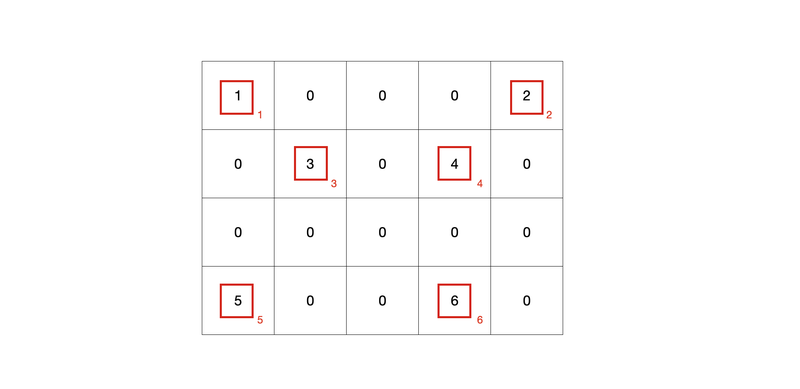

data는 0이 아닌 원소를 차례로 기입한 값이다.  
data = [1, 2, 3, 4, 5, 6]

indices는 data의 각 요소가 어느 열(column)에 있는지를 표현한 index이다.  
indices = [0, 4, 1, 3, 0, 3]

indptr은 각 행(row)에서 0이 아닌 첫 번째 원소가 data 리스트에서 의 몇 번째에 해당하는지와 마지막에 data 벡터의 길이를 추가한 값이다. 이를 통해 data의 요소들이 어느 행(row)에 있는지를 알 수 있다. 다만 예시의 세 번째 행처럼 0이 아닌 원소가 없는 경우엔 그 다음 행의 값과 같은 값을 넣었다.  
indptr = [0, 2, 4, 4, 6]

이를 통해 data[0:2]는 첫 번째 행, data[2:4]는 두 번째 행, data[4:4]는 세 번째 행, data[4:6]는 네 번째 행에 위치함을 나타낼 수 있게 된다.

이제 우리의 data를 CSR Matrix에 맞게 바꿔보겠다.  
DataFrame을 만드는 방식이 다양하듯 csr_matrix를 [만드는 방법][1]은 다양하게 있다.  
현재 data와 같은 데이터 구조에 적합한 방식은 위 링크(혹은 아래 사진)에서 4번째로 설명하고 있는 방법이다.

[1]:https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html

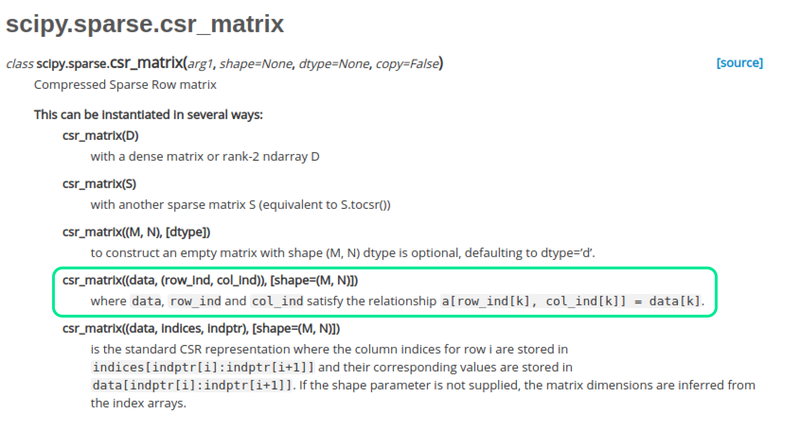

### CSR(Compressed Sparse Row) Matrix

In [25]:
# 실습 위에 설명보고 이해해서 만들어보기
from scipy.sparse import csr_matrix

num_user = movie_data['user_id'].nunique()
num_movie = movie_data['title'].nunique()

csr_data = csr_matrix((movie_data.counts, (movie_data.user_id, movie_data.title)), shape= (num_user, num_movie))
csr_data

<6040x3629 sparse matrix of type '<class 'numpy.int64'>'
	with 836483 stored elements in Compressed Sparse Row format>

우리의 data를 CSR Matrix에 맞게 바꾸었다.

### Matrix Factorization(MF)

앞서 전처리를 완료했으니 MF model을 구성하여 내가 좋아할 만한 영화를 추천해 볼 수 있다.

위에서 설명한 Matrix Factorization 모델을 [implicit][1] 패키지를 사용하여 학습해 보자.

[1]:https://github.com/benfred/implicit

● implicit 패키지는 이전 스텝에서 설명한 암묵적(implicit) dataset을 사용하는 다양한 모델을 굉장히 빠르게 학습할 수 있는 패키지이다.  
● 이 패키지에 구현된 als(AlternatingLeastSquares) 모델을 사용하겠다. Matrix Factorization에서 쪼개진 두 Feature Matrix를 한꺼번에 훈련하는 것은 잘 수렴하지 않기 때문에, 한쪽을 고정시키고 다른 쪽을 학습하는 방식을 번갈아 수행하는 AlternatingLeastSquares 방식이 효과적인 것으로 알려져 있다.

In [26]:
from implicit.als import AlternatingLeastSquares
import os
import numpy as np

# implicit 라이브러리에서 권장하고 있는 부분입니다. 학습 내용과는 무관합니다.
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

AlternatingLeastSquares 클래스의 __init__ 파라미터를 살펴보겠다.

● factors : 유저와 아이템의 벡터를 몇 차원으로 할 것인지  
● regularization : 과적합을 방지하기 위해 정규화 값을 얼마나 사용할 것인지  
● use_gpu : GPU를 사용할 것인지  
● iterations : epochs와 같은 의미입니다. 데이터를 몇 번 반복해서 학습할 것인지

1과 4를 늘릴수록 학습 데이터를 잘 학습하게 되지만 과적합의 우려가 있으니 좋은 값을 찾아야 한다.

In [27]:
# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=100, regularization=0.01, use_gpu=False, iterations=15, dtype=np.float32)

In [28]:
# als 모델은 input으로 (item X user 꼴의 matrix를 받기 때문에 Transpose해줍니다.)
csr_data_transpose = csr_data.T
csr_data_transpose

<3629x6040 sparse matrix of type '<class 'numpy.int64'>'
	with 836483 stored elements in Compressed Sparse Column format>

In [29]:
# 모델 훈련
als_model.fit(csr_data_transpose)

  0%|          | 0/15 [00:00<?, ?it/s]

모델 학습이 끝났다! 이제 2가지를 아래 사항을 살펴보자.

● yong 벡터와 jurassic park의 벡터를 어떻게 만들고 있는지  
● 두 벡터를 곱하면 어떤 값이 나오는지

In [30]:
yong, jurassic_park, Men_in_Black = user_to_idx['yong'], movie_to_idx['jurassic park (1993)'], movie_to_idx['Men in Black (1997)']
yong_vector, jurassic_park_vector, Men_in_Black_vector  = als_model.user_factors[yong], als_model.item_factors[jurassic_park], als_model.item_factors[Men_in_Black]

print('완료')

완료


In [31]:
yong_vector

array([ 2.10761175e-01, -3.10273975e-01, -1.02078110e-01,  5.53751349e-01,
       -4.54996258e-01,  3.95515203e-01, -2.92676419e-01,  7.44896084e-02,
       -7.30422258e-01, -3.10136110e-01,  3.83829087e-01,  8.25001895e-01,
       -1.09455392e-01,  4.69973803e-01, -3.13322812e-01,  7.50321001e-02,
        2.09690630e-01,  4.87119049e-01,  8.49209428e-01,  8.56518149e-02,
       -2.22530290e-01,  3.01055908e-01,  4.82458025e-01, -3.30561757e-01,
        3.28167468e-01, -1.20995641e-01,  1.54303253e-01,  5.06028056e-01,
       -4.89480700e-03,  2.57611424e-01, -1.75554916e-01, -6.33517981e-01,
        1.03505805e-01, -7.01817632e-01, -2.47462958e-01, -1.03681453e-01,
        6.17447615e-01, -2.49796137e-01,  5.23941889e-02,  3.51634383e-01,
        4.95382488e-01, -4.00692016e-01,  5.28884649e-01,  6.77599430e-01,
        9.84786868e-01,  5.74595213e-01, -5.44587553e-01, -3.28871638e-01,
        1.69004068e-01,  5.12358248e-01, -6.44999221e-02,  5.84151268e-01,
        6.19599938e-01,  

In [32]:
jurassic_park_vector

array([-0.00196642, -0.01981026, -0.02826689,  0.0120895 , -0.0111254 ,
        0.01908922, -0.00976465,  0.01501338, -0.01603306, -0.006267  ,
        0.02962937,  0.03328777,  0.0270777 ,  0.01869612,  0.0127356 ,
       -0.01377169,  0.02185979,  0.01746538,  0.02569927,  0.01232588,
       -0.01257848,  0.0149717 ,  0.0145448 , -0.00152029,  0.02661886,
        0.00150493,  0.01035262,  0.02438616,  0.01451439,  0.01203169,
        0.02298082,  0.00647165, -0.00515666,  0.006612  ,  0.00883856,
        0.02026479,  0.01216768,  0.00889662,  0.01082273, -0.00477683,
        0.0047215 ,  0.02548468,  0.03167257,  0.00952097,  0.04079195,
       -0.00409221, -0.02043474,  0.00787783,  0.02531181,  0.03631447,
        0.0062588 ,  0.02672758,  0.00714682,  0.02610978, -0.00578949,
       -0.00133944,  0.03552704, -0.00177706, -0.01008999, -0.01550899,
       -0.02242859,  0.03290436,  0.00090361, -0.01242844, -0.03615416,
       -0.01280798, -0.00265869, -0.01191195,  0.03853044, -0.01

In [33]:
Men_in_Black_vector

array([ 3.4928328e-04,  6.4470875e-04,  9.8733159e-05,  1.1049174e-04,
        2.4971465e-04,  8.1326824e-04,  5.7478808e-04,  5.4314861e-04,
        4.2318741e-05, -1.0399413e-04,  8.7245251e-04,  7.2053517e-04,
        5.0531479e-04,  9.9023455e-04,  8.4786408e-04,  5.7610823e-04,
        2.9466022e-04,  4.2516016e-04,  4.5007042e-04, -2.0899097e-05,
        6.5490935e-04,  8.8346913e-04,  8.9053203e-05,  4.3396460e-04,
        6.8277033e-04,  9.8326767e-04,  7.0860155e-04, -4.8681824e-05,
        2.4437136e-04,  2.2608225e-04,  2.6816702e-05,  2.2765555e-04,
        2.9147690e-04,  1.9960142e-04,  1.2258171e-03, -1.1807691e-04,
        1.2606595e-03,  3.2670263e-04,  4.8272719e-04,  5.2176253e-04,
        2.9042942e-04,  2.3464372e-04,  6.4074376e-04,  7.5939001e-04,
        8.4745587e-04,  9.2772016e-04,  2.9982682e-04,  1.3698218e-04,
        4.5378043e-04,  6.9769105e-04,  5.8762124e-04,  4.4781383e-04,
        4.8917299e-04,  8.8343065e-04,  5.2588753e-04,  2.8336345e-04,
      

In [34]:
# yong과 jurassic_park를 내적하는 코드
np.dot(yong_vector, jurassic_park_vector)

0.65729535

1이 나오면 좋겠지만 조금 낮은 수치인 0.65 정도가 나왔다. 물론 아주 나쁘지는 않다. factors를 늘리거나 iterations를 늘리면 될 것이다. 이후 진행되는 내용은 일단 이렇게 학습된 모델을 사용하겠다.

In [35]:
# yong과 Men_in_Black을 내적하는 코드
np.dot(yong_vector, Men_in_Black_vector)

0.008453409

1이 나오면 좋겠지만 매우 낮은 수치인 0.008 정도가 나왔다.

(참고)  
Q : 만약 이 두 수치를 늘려 1에 가깝게 나왔다면 이 모델이 잘 학습되었다고 볼 수 있을까?

A : 정답은 아직 검증되지 않았다고 볼 수 있다. 학습 데이터에 대해서 fitting은 되었지만 아직 보지 못한 데이터에 대한, 예를 들어 내가 다른 영화를 선호할지에 대한 예측을 잘할지 못할지는 검증하지 않았기 때문이다.

그렇다면 모델이 나의 terminator에 대한 선호도를 어떻게 예측할지 한 번 보겠다.

In [36]:
terminator = movie_to_idx['terminator, the (1984)']
terminator_vector = als_model.item_factors[terminator]
np.dot(yong_vector, terminator_vector)

0.5196904

0.51이 나왔다.

(참고)  
Q : terminator에 대한 선호도를 예측한 결과를 어떻게 해석하면 좋을까? 사용자와 영화 벡터 내적이 0.5를 기준으로 그보다 높으면 모델이 선호한다고 판단했다고 말할 수 있을까?

A : 모델을 만드는 사람이 정하기 나름이다. 객관적인 지표로 만들어서 기준을 정할 수도 있고 도메인 경험을 통해 정할 수도 있다.  
추천 시스템은 다른 머신러닝 task보다 객관적인 평가가 어려운 분야이다. 사람을 도통 알 수 없기 때문에 객관적인 지표를 정하기 어렵기 때문이다.

물론 나는 terminator 영화가 마음에 든다!

In [37]:
one_little_indian = movie_to_idx['one little indian (1973)']
one_little_indian_vector = als_model.item_factors[one_little_indian]
np.dot(yong_vector, one_little_indian_vector)

0.0025046188

0.002이 나왔다. 내가 좋아하지 않는 장르라고 판단하여 추천을 하지 않은 것으로 판단된다.

### 비슷한 영화 찾기 + 유저에게 추천하기

#### 비슷한 영화 찾기  
AlternatingLeastSquares 클래스에 구현되어 있는 similar_items 메서드를 통하여 비슷한 영화를 찾는다. 처음으로는 내가 좋아하는 terminator 2: judgment day로 찾아보겠다.

In [38]:
favorite_movie = 'terminator 2: judgment day (1991)'
movie_id = movie_to_idx[favorite_movie]
similar_movie = als_model.similar_items(movie_id, N=15)
similar_movie

[(92, 1.0),
 (124, 0.7660348),
 (107, 0.70701474),
 (62, 0.69337755),
 (175, 0.6225822),
 (200, 0.6031195),
 (141, 0.5188543),
 (3628, 0.49323186),
 (87, 0.48002326),
 (75, 0.445195),
 (375, 0.40907916),
 (3466, 0.40887123),
 (651, 0.39853826),
 (193, 0.38569567),
 (44, 0.37588364)]

(영화의 id, 유사도) Tuple 로 반환하고 있다. 영화의 id를 다시 영화의 이름으로 매핑시켜 주겠다.

In [39]:
# movie_to_idx 를 뒤집어, index로부터 moive 이름을 얻는 dict를 생성합니다. 
idx_to_movie = {v:k for k,v in movie_to_idx.items()}
[idx_to_movie[i[0]] for i in similar_movie]

['terminator 2: judgment day (1991)',
 'matrix, the (1999)',
 'jurassic park (1993)',
 'total recall (1990)',
 'men in black (1997)',
 'terminator, the (1984)',
 'fugitive, the (1993)',
 'Men in Black (1997)',
 'braveheart (1995)',
 'hunt for red october, the (1990)',
 'face/off (1997)',
 'schlafes bruder (brother of sleep) (1995)',
 'aliens (1986)',
 'alien (1979)',
 'star wars: episode iv - a new hope (1977)']

몇 번 더 반복해서 확인하기 위해 위의 코드를 함수로 만들고 확인해 보겠다.

In [40]:
def get_similar_movie(movie_name: str):
    movie_id = movie_to_idx[movie_name]
    similar_movie = als_model.similar_items(movie_id , N=15)
    similar_movie = [idx_to_movie[i[0]] for i in similar_movie]
    return similar_movie

print("완료")

완료


matrix으로도 확인해 보겠다.

In [41]:
get_similar_movie('matrix, the (1999)')

['matrix, the (1999)',
 'terminator 2: judgment day (1991)',
 'total recall (1990)',
 'fugitive, the (1993)',
 'terminator, the (1984)',
 'fifth element, the (1997)',
 'jurassic park (1993)',
 'face/off (1997)',
 'men in black (1997)',
 'hunt for red october, the (1990)',
 'Men in Black (1997)',
 'twelve monkeys (1995)',
 'star wars: episode iv - a new hope (1977)',
 'alien (1979)',
 'star wars: episode v - the empire strikes back (1980)']

내가 좋아하는 영화와 비슷한 영화를 잘 추천해주는 것을 확인할 수 있다.

#### 유저에게 영화 추천하기

AlternatingLeastSquares 클래스에 구현되어 있는 recommend 메서드를 통하여 내가 좋아할 만한 영화를 추천받는다. filter_already_liked_items는 유저가 이미 평가한 아이템은 제외하는 Argument이다.

In [42]:
user = user_to_idx['yong']
# recommend에서는 user*item CSR Matrix를 받습니다.
movie_recommended = als_model.recommend(user, csr_data, N=20, filter_already_liked_items=True)
movie_recommended

[(175, 0.51707363),
 (62, 0.5133062),
 (141, 0.34968886),
 (193, 0.3049228),
 (44, 0.30117106),
 (651, 0.29592788),
 (87, 0.28654873),
 (375, 0.26968375),
 (145, 0.26040593),
 (75, 0.24949555),
 (117, 0.24221629),
 (194, 0.22985257),
 (317, 0.21453395),
 (82, 0.21437928),
 (38, 0.21031767),
 (150, 0.20685989),
 (685, 0.20385107),
 (372, 0.20198196),
 (22, 0.20160922),
 (865, 0.20088452)]

In [43]:
[idx_to_movie[i[0]] for i in movie_recommended]

['men in black (1997)',
 'total recall (1990)',
 'fugitive, the (1993)',
 'alien (1979)',
 'star wars: episode iv - a new hope (1977)',
 'aliens (1986)',
 'braveheart (1995)',
 'face/off (1997)',
 'fifth element, the (1997)',
 'hunt for red october, the (1990)',
 'star wars: episode v - the empire strikes back (1980)',
 'die hard (1988)',
 'twelve monkeys (1995)',
 'lost world: jurassic park, the (1997)',
 'sixth sense, the (1999)',
 'independence day (id4) (1996)',
 'planet of the apes (1968)',
 'x-men (2000)',
 'back to the future (1985)',
 'predator (1987)']

aliens를 추천해 주었다. 모델은 왜 aliens를 추천해 주었을까? AlternatingLeastSquares 클래스에 구현된 explain 메서드를 사용하면 본인이 기록을 남긴 데이터 중 이 추천에 기여한 정도를 확인할 수 있다.

In [44]:
aliens = movie_to_idx['aliens (1986)']
explain = als_model.explain(user, csr_data, itemid = aliens)

이 method는 추천한 콘텐츠의 점수에 기여한 다른 콘텐츠와 기여도(합이 콘텐츠의 점수가 됩니다.)를 반환한다. 어떤 영화들이 이 추천에 얼마나 기여하고 있는 걸까?

In [45]:
[(idx_to_movie[i[0]], i[1]) for i in explain[1]]

[('terminator, the (1984)', 0.2380337438430891),
 ('terminator 2: judgment day (1991)', 0.08291883806509767),
 ('matrix, the (1999)', 0.05173586947388037),
 ('Men in Black (1997)', 0.00010653582017088144),
 ('jurassic park (1993)', -0.08033082420855017)]

terminator와 terminator 2가 가장 기여가 많은 것을 확인할 수 있다. sf물을 좋아하니 sf물을 추천해준 것으로 판단된다.

모델이 추천한 20개 중 몇 개를 실제로 선호하는지 계산하여 모델의 객관적인 지표를 만들 수 있을 것 같다. 자세한 방법은 [이쪽][1]을 참고한다.

[1]:https://danthetech.netlify.app/DataScience/evaluation-metrics-for-recommendation-system

In [46]:
aladdin = movie_to_idx['aladdin (1992)']
explain = als_model.explain(user, csr_data, itemid=aladdin)

In [47]:
[(idx_to_movie[i[0]], i[1]) for i in explain[1]]

[('terminator, the (1984)', 0.005604318189425996),
 ('terminator 2: judgment day (1991)', 0.00012643303722217956),
 ('Men in Black (1997)', -0.0003237027543692311),
 ('jurassic park (1993)', -0.0015460287938021447),
 ('matrix, the (1999)', -0.006552710115744632)]

In [48]:
# men in black = movie_to_idx['men in black (1997)']
# explain = als_model.explain(user, csr_data, itemid = men in black)

In [49]:
# [(idx_to_movie[i[0]], i[1]) for i in explain[1]]

## EXPLORATION 14 회고

나를 코딩에 뛰어들게 한 것이 추천시스템에 대한 매력때문이었다. 추천시스템을 내 손으로 만들어 봐서 즐거웠다. 예상치 못한 변수때문에 시간을 많이 투자했지만 재미가 있어서 프로젝트를 잘 마무리했다고 생각한다.

●이번 프로젝트에서 어려웠던 점  
이론이 크게 어려운 편은 아니었으나 머릿속에 다 들어온 것도 아니다. 즉, 다시 봐야 된다. 코드들도 많이 익숙해졌지만, 조금만 복잡해져도 외우기가 힘들다. 그럼에도 불구하고 나아지고 있다는 것에 감사한다.

※ Matrix Factorization(MF), CSR(Compressed Sparse Row) Matrix 개념을 잘 알아두자.

●프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점  
생각지 못하게 이틀 정도 시간을 쓰게 한 부분이 있다. "비슷한 영화 찾기 + 유저에게 추천하기" 부분에서 에러가 나 어디서 잘못된 것인지 한참을 찾았다. 나중에 알고보니 ratings, movies 데이터를 합쳐서 사용하고 있었는데 ratings 데이터를 이용하여 진행을 하려고 하니 에러가 난 것이었다. ratings 데이터 안에는 movies 데이터가 없기 때문에 당연히 에러가 날 수 밖에 없었다. 코드가 워낙 많다 보니 시간을 굉장히 많이 쓴 것으로 기억에 남는다.

lms상에서 복사해온 코드가 쥬피터 노트북에서 에러가 나 두 시간 정도 시간을 썼다. 마지막 부분(유저에게 영화 추천하기)에서 에러가 나 굉장히 당황스러웠다. 틀린 부분이 없기 때문에 마지막까지 구동이 잘된 것이기 때문이다. 모델이 men in black을 추천해 주어 이 영화를 추천하는데 기여한 영화가 무엇인지 보려고 한 것이었는데 이 코드가 틀린 점이 없음에도 불구하고 구동이 되지 않았다. 그렇게 의미없는 시간을 보내다가 최근 같은 lms상 코드를 가져왔어도 복사가 잘 안됐다는 이야기를 들은 적이 있어 혹시나 하는 마음으로 다른 사람의 코드를 가져와서 써보았다. 신기하게도 잘 구동됐다. 아래 사진 마지막 코드가 구동이 되지 않는 코드이다. aliens와 aladdin은 다른 사람의 코드를 가져온 것인데 잘되는 것을 확인할 수 있다. 최근 다른 사람의 에러를 보지 못했다면 하루를 바쳐도 못 찾아내는 에러로 남았을 것이다. 경험이 큰 자산임을 깨닫는다.

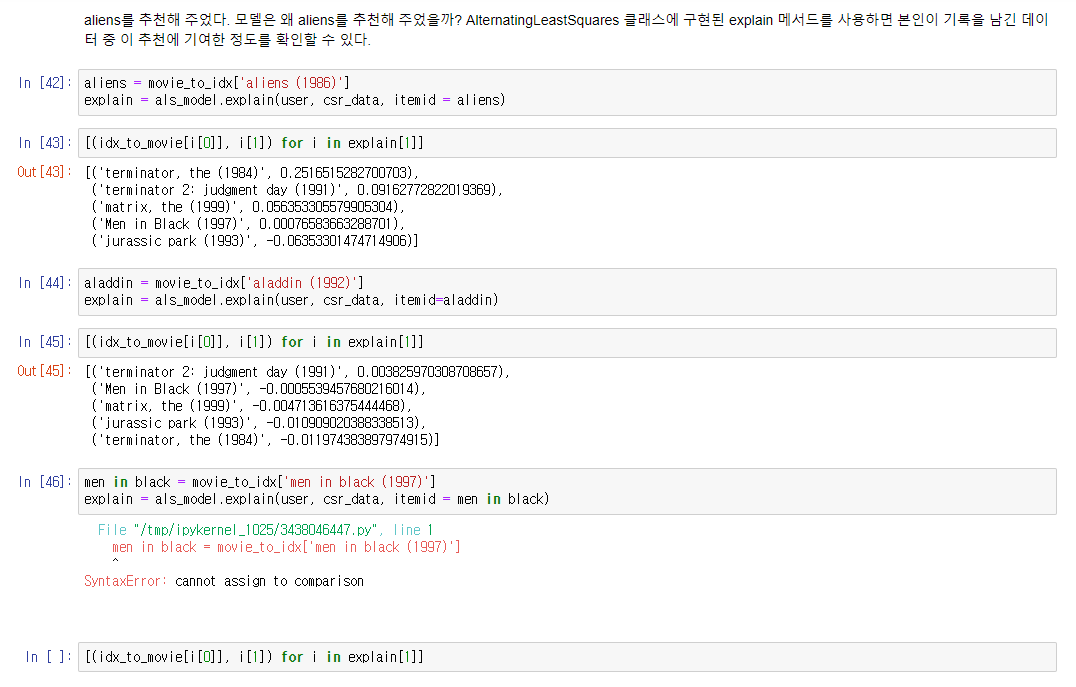

●루브릭 평가 지표를 맞추기 위해 시도한 것들  
순서에 맞게 차례차례 진행하였다. 에러가 난 부분을 제외하고는 큰 어려움은 없었다.

●자기 다짐  
점점 어려워지고 있지만 여기까지 온 것에 대해 감사한다. 이제 exploration이 얼마 안남았다. 익숙해도 어려움의 연속일 것으로 생각되기 때문에 긴장을 늦추면 안될 것 같다. 마지막까지 최선을 다하자.